#（自分のアカウントの）Googleドライブをマウント


In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# どこのフォルダを合成するか？　どこに出力するか？　を指定してください。
*  元画像のフォルダは dir_in
*  出力するフォルダは dir_out




In [ ]:

import os

base_dir = r"/content/drive/MyDrive/OffloadContest/"
dir_in= base_dir+ r"train_images_A"
dir_out = base_dir+r"br_change_A"





#Check dir_inのチェック

*   PNGファイルが沢山あるはず？
*   他のものはないはず？
*   ソートしています


In [ ]:
src_files = os.listdir(dir_in)
src_files.sort()
print(src_files)


['A0000.png', 'A0001.png', 'A0002.png', 'A0003.png', 'A0004.png', 'A0005.png', 'A0006.png', 'A0007.png', 'A0008.png', 'A0009.png', 'A0010.png', 'A0011.png', 'A0012.png', 'A0013.png', 'A0014.png', 'A0015.png', 'A0016.png', 'A0017.png', 'A0018.png', 'A0019.png', 'A0020.png', 'A0021.png', 'A0022.png', 'A0023.png', 'A0024.png', 'A0025.png', 'A0026.png', 'A0027.png', 'A0028.png', 'A0029.png', 'A0030.png', 'A0031.png', 'A0032.png', 'A0033.png', 'A0034.png', 'A0035.png', 'A0036.png', 'A0037.png', 'A0038.png', 'A0039.png', 'A0040.png', 'A0041.png', 'A0042.png', 'A0043.png', 'A0044.png', 'A0045.png', 'A0046.png', 'A0047.png', 'A0048.png', 'A0049.png', 'A0050.png', 'A0051.png', 'A0052.png', 'A0053.png', 'A0054.png', 'A0055.png', 'A0056.png', 'A0057.png', 'A0058.png', 'A0059.png', 'A0060.png', 'A0061.png', 'A0062.png', 'A0063.png', 'A0064.png', 'A0065.png', 'A0066.png', 'A0067.png', 'A0068.png', 'A0069.png', 'A0070.png', 'A0071.png', 'A0072.png', 'A0073.png', 'A0074.png', 'A0075.png', 'A0076.png'

# Check OpenCVで最初の画像を読み込みチェック

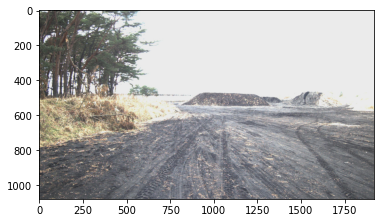

In [ ]:
import cv2
import matplotlib.pyplot as plt
fn=src_files[0]
chk_img = cv2.imread( os.path.join(dir_in,fn))
chk_img = cv2.cvtColor(chk_img, cv2.COLOR_BGR2RGB)
plt.imshow(chk_img)


#Check 画素数、フォーマットの確認




In [ ]:
print(chk_img.shape)


(1080, 1920, 3)


#Check 明るさ調整確認

mul,addのスライダーで数値を調整

好ましい値を控えて、後で全画像を処理

In [ ]:
from ipywidgets import widgets
import numpy as np

ui_sliders = {}

# 乗算スライダー
ui_sliders["mul"] = widgets.FloatSlider(
    min=0.0, max=3.0, step=0.1, value=1.0, description="mul: "
)

# 加算スライダー
ui_sliders["add"] = widgets.FloatSlider(
    min=-100.0, max=100.0, step=10.0, value=0.0, description="add: "
)

for x in ui_sliders.values():
    x.layout.width = "400px"

# 乗算、加算でピクセルの明るさの変更
def calc_image_pixel(img, mul=1.0, add=0.0):
    pix = mul * img + add
    # [0, 255] でクリップし、uint8 型にする。
    return np.clip(pix, 0, 255).astype(np.uint8)

# uiのコールバック
def ui_update(chk_img, mul, add):
    #明るさ変更 -> 表示
    chk_img = calc_image_pixel(chk_img, mul, add)
    plt.imshow(chk_img)

# ウィジェットを表示する。
widgets.interactive(ui_update, chk_img=widgets.fixed(chk_img), **ui_sliders)


interactive(children=(FloatSlider(value=1.0, description='mul: ', layout=Layout(width='400px'), max=3.0), Floa…

#フォルダ内のすべてのファイルを処理

仕様
*   同じファイル名で、dir_outフォルダへ保存






In [ ]:
#import shutil
#shutil.rmtree(dir_out)
os.makedirs(dir_out, exist_ok=True)

#テスト用 5個だけにする
src_files= src_files[:5]

#どれだけ明るく（暗く）するか
mul=1.1
add=5

for fn in src_files:
  fn_in=os.path.join(dir_in,fn)
  fn_out=os.path.join(dir_out,fn)

  img_in = cv2.imread(fn_in)
  img_in = cv2.cvtColor(img_in, cv2.COLOR_BGR2RGB)

  img_out = calc_image_pixel(img_in,mul,add)

  img_out = cv2.cvtColor(img_out, cv2.COLOR_RGB2BGR)
  cv2.imwrite(fn_out,img_out)



